Step 12: Channel Flow with Navier–Stokes
----
***

The only difference between this final step and Step 11 is that we are going to add a source term to the $u$-momentum equation, to mimic the effect of a pressure-driven channel flow. Here are our modified Navier–Stokes equations:

$$\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y}=-\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu\left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2}\right)+F$$

$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y}=-\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right)$$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2}=-\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y}\right)
$$

### Discretized equations

With patience and care, we write the discretized form of the equations. It is highly recommended that you write these in your own hand, mentally following each term as you write it.

The $u$-momentum equation:

$$
\begin{split}
& \frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y} = \\
& \qquad -\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x} \\
& \qquad +\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right)+F_{i,j}
\end{split}
$$

The $v$-momentum equation:

$$
\begin{split}
& \frac{v_{i,j}^{n+1}-v_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta y} = \\
& \qquad -\frac{1}{\rho}\frac{p_{i,j+1}^{n}-p_{i,j-1}^{n}}{2\Delta y} \\
& \qquad +\nu\left(\frac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta x^2}+\frac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta y^2}\right)
\end{split}
$$

And the pressure equation:

$$
\begin{split}
& \frac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta x^2} + \frac{p_{i,j+1}^{n}-2p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta y^2} = \\
& \qquad \rho\left[\frac{1}{\Delta t}\left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}+\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) - \frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

As always, we need to re-arrange these equations to the form we need in the code to make the iterations proceed. 

For the $u$- and $v$ momentum equations, we isolate the velocity at time step `n+1`:

$$
\begin{split}
u_{i,j}^{n+1} = u_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(u_{i,j}^{n}-u_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(u_{i,j}^{n}-u_{i,j-1}^{n}\right) \\
& - \frac{\Delta t}{\rho 2\Delta x} \left(p_{i+1,j}^{n}-p_{i-1,j}^{n}\right) \\
& + \nu\left[\frac{\Delta t}{\Delta x^2} \left(u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}\right)\right] \\
& + \Delta t F
\end{split}
$$

$$
\begin{split}
v_{i,j}^{n+1} = v_{i,j}^{n} & - u_{i,j}^{n} \frac{\Delta t}{\Delta x} \left(v_{i,j}^{n}-v_{i-1,j}^{n}\right) - v_{i,j}^{n} \frac{\Delta t}{\Delta y} \left(v_{i,j}^{n}-v_{i,j-1}^{n}\right) \\
& - \frac{\Delta t}{\rho 2\Delta y} \left(p_{i,j+1}^{n}-p_{i,j-1}^{n}\right) \\
& + \nu\left[\frac{\Delta t}{\Delta x^2} \left(v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}\right) + \frac{\Delta t}{\Delta y^2} \left(v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}\right)\right]
\end{split}
$$

And for the pressure equation, we isolate the term $p_{i,j}^n$ to iterate in pseudo-time:

$$
\begin{split}
p_{i,j}^{n} = & \frac{\left(p_{i+1,j}^{n}+p_{i-1,j}^{n}\right) \Delta y^2 + \left(p_{i,j+1}^{n}+p_{i,j-1}^{n}\right) \Delta x^2}{2(\Delta x^2+\Delta y^2)} \\
& -\frac{\rho\Delta x^2\Delta y^2}{2\left(\Delta x^2+\Delta y^2\right)} \\
& \times \left[\frac{1}{\Delta t} \left(\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} + \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right) - \frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x}\frac{u_{i+1,j}-u_{i-1,j}}{2\Delta x} - 2\frac{u_{i,j+1}-u_{i,j-1}}{2\Delta y}\frac{v_{i+1,j}-v_{i-1,j}}{2\Delta x} - \frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\frac{v_{i,j+1}-v_{i,j-1}}{2\Delta y}\right]
\end{split}
$$

The initial condition is $u, v, p=0$ everywhere, and at the boundary conditions are:

$u, v, p$ are periodic on $x=0,2$

$u, v =0$ at $y =0,2$

$\frac{\partial p}{\partial y}=0$ at $y =0,2$

$F=1$ everywhere.

Let's begin by importing our usual run of libraries:


### Self note
#### Understanding Periodic Boundary Conditions in a Grid
When you're working with a grid in computational simulations, you often need to handle "the edges of the grid in a special way". Periodic boundary conditions (PBCs) are one way to do this.

#### What Are Periodic Boundary Conditions?
Imagine you have a grid that represents a physical space. With periodic boundary conditions, the grid is treated as if it wraps around on itself. This means:
If something moves off the right edge of the grid, it reappears on the left edge.
If something moves off the top edge, it reappears at the bottom edge.
This creates a continuous loop, much like a video game where moving off one side of the screen brings you back on the opposite side.

#### Why Use Periodic Boundary Conditions?
PBCs are used to simulate an infinite system using a finite grid. This is particularly useful in simulations of physical systems like fluids, gases, or even traffic flow, where you want to avoid edge effects and simulate a more realistic environment.

#### Applying Periodic Boundary Conditions to a Vector
In your context, you have a vector u that represents some values on a grid. When you apply periodic boundary conditions, you need to handle the values at the edges of this vector carefully.

#### Leading and Trailing Edge of the Vector
1. Leading Edge: This is the first element of your vector.
2. Trailing Edge: This is the last element of your vector.
With periodic boundary conditions, the value at the trailing edge of the vector influences the leading edge, and vice versa.

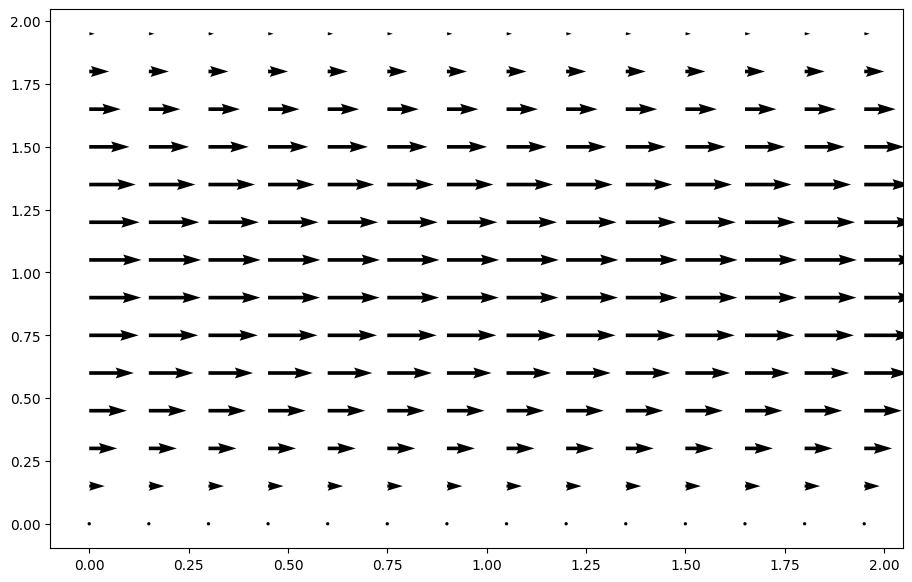

In [3]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

from input_variables import SetupParameters
from grid import MeshGrid
from difference_equations import DiscretizationSchemes
from matrix_init import MatrixInitializer
from physics import *
from boundary_conditions import BCs
from visualization import *
from test import *

def main():
    params= SetupParameters(nx = 41, ny = 41, nt = 500, nppi=50, rho_fluid = 1, nu = 0.1, F=1, dt = 0.01)
    X, Y, dx, dy = MeshGrid.mesh(params.nx, params.ny, params.lx, params.ly)
    
    ux_prev = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    uy_prev = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    # ux_prev = BCs.velocity_BCx(ux_prev)
    # ux_prev = BCs.velocity_BCy(ux_prev)
    
    ux_next = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    uy_next = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    
    p_prev = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=False, initial_value=1)
    p_next = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=False, initial_value=1)
    
    b_i_j_prev = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=True)
    
    for iterations in range (params.nt):
        ux_prev = ux_next.copy()
        uy_prev = uy_next.copy()
        p_prev = p_next.copy()
        # b_i_j_prev = b_i_j.copy()
        
        b_i_j = PressurePoisson.source_laplace_poisson_pressure_time_periodic_ux_2d(b_i_j_prev, ux_prev, uy_prev,
                                                        params.rho_fluid, params.dt, params.dx, params.dy)
        
        # # for debugging purpuse:
        # if b_i_j is None:
        #     print("Error: b_i_j is None after source calculation")
        #     break
    
        # print("b_i_j shape:", b_i_j.shape)
        # print("p_prev shape:", p_prev.shape)
    
        p_next = PressurePoisson.laplace_poisson_pressure_advance_periodic_ux_2d(p_prev, b_i_j, params.dx,
                                                        params.dy, params.nx, params.ny, params.nppi)
        
        # if p_next is None:
        #     print("Error: p_next is None after pressure calculation")
        #     break
    
        # print("p_next shape:", p_next.shape)
        
        ux_next = PressurePoisson.laplace_poisson_pressure_periodic_horizontal_flow(ux_prev, ux_next, uy_prev,
                                p_next, params.dx, params.dy, params.dt, params.rho_fluid, params.nu, params.F) 
        uy_next = PressurePoisson.laplace_poisson_pressure_periodic_vertical_flow(ux_prev, uy_prev, uy_next,
                                p_next, params.dx, params.dy, params.dt, params.rho_fluid, params.nu)
        
        # Wall BC: u,v = 0 @ y = 0,2
        ux_next[0, :] = 0
        ux_next[-1, :] = 0
        uy_next[0, :] = 0
        uy_next[-1, :]= 0
        
        # ux_prev = ux_next
        # uy_prev = uy_next
        # p_prev = p_next
        # b_i_j_prev = b_i_j
        
        
    fig = plt.figure(figsize = (11,7), dpi=100)
    plt.quiver(X[::3, ::3], Y[::3, ::3], ux_next[::3, ::3], uy_next[::3, ::3])    
        
    
if __name__ == "__main__":
    main ()